In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dataparser as dp

How many seizures are available for each patient?

In [2]:
df = pd.read_excel('seizure_occurrence.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Case ID        22 non-null     object 
 1   Seizures       22 non-null     int64  
 2   Channel Count  0 non-null      float64
 3   Unnamed: 3     0 non-null      float64
 4   Unnamed: 4     0 non-null      float64
 5   Unnamed: 5     0 non-null      float64
 6   Unnamed: 6     0 non-null      float64
 7   Median         2 non-null      object 
 8   5.5            2 non-null      float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.7+ KB


In [3]:
labels = df['Case ID']
counts = df['Seizures']

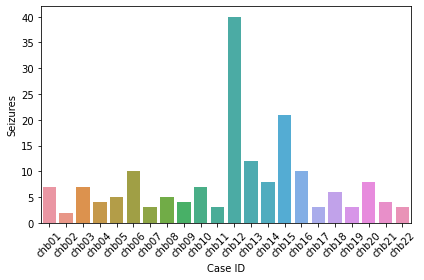

In [4]:
ax = sns.barplot(x=labels, y=counts, data=df)
# ax.axhline(10, ls='--', c='red')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.savefig('../figures/exploration/seizure_count_cases.pdf')
plt.show()

In [14]:
df = pd.DataFrame(labels)
df['Seizures'] = pd.Series(counts)
df

,Case ID,Seizures
0,chb01,7
1,chb02,2
2,chb03,7
3,chb04,4
4,chb05,5
5,chb06,10
6,chb07,3
7,chb08,5
8,chb09,4
9,chb10,7


In [6]:
df['Seizures'].sum()

175

In [7]:
df['Seizures'].mean()

7.954545454545454

How many channels are used to record EEG for each patient?

In [8]:
rootdir = '/Volumes/My Passport/AI_Research/data/physionet.org/files/chbmit/1.0.0/'
ch_counts = []
for i in range(1, 10):
    patient_id = f'chb0{i}'
    parser = dp.DataParser(rootdir, patient_id)
    dict_files = parser._patient_summary()
    df = pd.DataFrame(data=dict_files)
    df = df.T
    ch_counts.append(len(df['Channels'][i]))
for i in range(10, 23):
    patient_id = f'chb{i}'
    parser = dp.DataParser(rootdir, patient_id)
    dict_files = parser._patient_summary()
    df = pd.DataFrame(data=dict_files)
    df = df.T
    ch_counts.append(len(df['Channels'][i]))

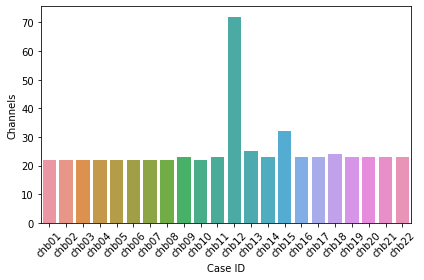

In [9]:
ax = sns.barplot(x=labels, y=ch_counts, data=df)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.ylabel('Channels')
plt.tight_layout()
plt.savefig('../figures/exploration/channel_count_cases.pdf')
plt.show()

In [16]:
df['Channels'] = pd.Series(ch_counts)
df

,Case ID,Seizures,Channels
0,chb01,7,22
1,chb02,2,22
2,chb03,7,22
3,chb04,4,22
4,chb05,5,22
5,chb06,10,22
6,chb07,3,22
7,chb08,5,22
8,chb09,4,23
9,chb10,7,22


In [17]:
df['Channels'].mode()

0    22
1    23
dtype: int64

In [18]:
df[(df['Channels'] == 22) & (df['Seizures'] > 5)]

,Case ID,Seizures,Channels
0,chb01,7,22
2,chb03,7,22
5,chb06,10,22
9,chb10,7,22


How many hours of EEG have been recorded for each patient?

In [30]:
for i in range(1, 10):
    patient_id = f'chb0{i}'
    parser = dp.DataParser(rootdir, patient_id)
    dict_files = parser._patient_summary()
    df = pd.DataFrame(data=dict_files)
    df = df.T
    files = df.index.tolist()
    for file in files:
        start = df['Start Time'][i]
        end = df['End Time'][i]
        print(file, start, end, parser._time_difference(start, end))
    print('---')

chb01_01 12:42:57 13:42:57 3600.0
chb01_02 12:42:57 13:42:57 3600.0
chb01_03 12:42:57 13:42:57 3600.0
chb01_04 12:42:57 13:42:57 3600.0
chb01_05 12:42:57 13:42:57 3600.0
chb01_06 12:42:57 13:42:57 3600.0
chb01_07 12:42:57 13:42:57 3600.0
chb01_08 12:42:57 13:42:57 3600.0
chb01_09 12:42:57 13:42:57 3600.0
chb01_10 12:42:57 13:42:57 3600.0
chb01_11 12:42:57 13:42:57 3600.0
chb01_12 12:42:57 13:42:57 3600.0
chb01_13 12:42:57 13:42:57 3600.0
chb01_14 12:42:57 13:42:57 3600.0
chb01_15 12:42:57 13:42:57 3600.0
chb01_16 12:42:57 13:42:57 3600.0
chb01_17 12:42:57 13:42:57 3600.0
chb01_18 12:42:57 13:42:57 3600.0
chb01_19 12:42:57 13:42:57 3600.0
chb01_20 12:42:57 13:42:57 3600.0
chb01_21 12:42:57 13:42:57 3600.0
chb01_22 12:42:57 13:42:57 3600.0
chb01_23 12:42:57 13:42:57 3600.0
chb01_24 12:42:57 13:42:57 3600.0
chb01_25 12:42:57 13:42:57 3600.0
chb01_26 12:42:57 13:42:57 3600.0
chb01_27 12:42:57 13:42:57 3600.0
chb01_29 12:42:57 13:42:57 3600.0
chb01_30 12:42:57 13:42:57 3600.0
chb01_31 12:42

In [32]:
for i in range(10, 11):
    patient_id = f'chb{i}'
    parser = dp.DataParser(rootdir, patient_id)
    dict_files = parser._patient_summary()
    df = pd.DataFrame(data=dict_files)
    df = df.T
    files = df.index.tolist()
    for file in files:
        start = df['Start Time'][i]
        end = df['End Time'][i]
        print(file, start, end, parser._time_difference(start, end))
    print('---')

chb10_01 19:55:15 21:55:15 7200.0
chb10_02 19:55:15 21:55:15 7200.0
chb10_03 19:55:15 21:55:15 7200.0
chb10_04 19:55:15 21:55:15 7200.0
chb10_05 19:55:15 21:55:15 7200.0
chb10_06 19:55:15 21:55:15 7200.0
chb10_07 19:55:15 21:55:15 7200.0
chb10_08 19:55:15 21:55:15 7200.0
chb10_12 19:55:15 21:55:15 7200.0
chb10_13 19:55:15 21:55:15 7200.0
chb10_14 19:55:15 21:55:15 7200.0
chb10_15 19:55:15 21:55:15 7200.0
chb10_16 19:55:15 21:55:15 7200.0
chb10_17 19:55:15 21:55:15 7200.0
chb10_18 19:55:15 21:55:15 7200.0
chb10_19 19:55:15 21:55:15 7200.0
chb10_20 19:55:15 21:55:15 7200.0
chb10_21 19:55:15 21:55:15 7200.0
chb10_22 19:55:15 21:55:15 7200.0
chb10_27 19:55:15 21:55:15 7200.0
chb10_28 19:55:15 21:55:15 7200.0
chb10_30 19:55:15 21:55:15 7200.0
chb10_31 19:55:15 21:55:15 7200.0
chb10_38 19:55:15 21:55:15 7200.0
chb10_89 19:55:15 21:55:15 7200.0
---
